# Image Denoising

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Loading dataset Mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data() # labels not assigned
x_train[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

## Preprocessing data

In [3]:
# Normalizing values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Add dimension for conv layer
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## Adding noise

In [41]:
# adding random noise
noise_factor = 0.4 # con 0.2 buone immagini e avg(PSNR)=25.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# The pixel values are clipped to ensure they remain within the valid range of 0 to 1.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Autoencoder model creation

In [ ]:
# creazione autoencoder
input_shape = (28, 28, 1)
latent_dim = 128

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
latent_repr = Dense(latent_dim)(x)

# Decoder
x = Dense(7 * 7 * 64)(latent_repr)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same')(x)
decoded = Conv2DTranspose(1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # ho provato con binary_crossentropy ma risultati peggiori
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

'''
rete più complessa
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Model

input_layer = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), padding='same')(input_layer)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)

# Decoder
x = Conv2D(128, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.1)(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.1)(x)
x = UpSampling2D((2, 2))(x)

output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse') '''


" \nfrom tensorflow.keras.layers import Input, Conv2D, UpSampling2D, LeakyReLU, BatchNormalization\nfrom tensorflow.keras.models import Model\n\ninput_layer = Input(shape=(28, 28, 1))\n\n# Encoder\nx = Conv2D(32, (3, 3), padding='same')(input_layer)\nx = LeakyReLU(alpha=0.1)(x)\nx = BatchNormalization()(x)\n\nx = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(x)\nx = LeakyReLU(alpha=0.1)(x)\nx = BatchNormalization()(x)\n\nx = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)\nx = LeakyReLU(alpha=0.1)(x)\nx = BatchNormalization()(x)\n\n# Decoder\nx = Conv2D(128, (3, 3), padding='same')(x)\nx = LeakyReLU(alpha=0.1)(x)\nx = UpSampling2D((2, 2))(x)\n\nx = Conv2D(64, (3, 3), padding='same')(x)\nx = LeakyReLU(alpha=0.1)(x)\nx = UpSampling2D((2, 2))(x)\n\noutput_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)\n\nautoencoder = Model(input_layer, output_layer)\nautoencoder.compile(optimizer='adam', loss='mse') "

### Differences between networks:
#### Encoder:
- **Activation:** The simpler network uses **ReLU**, while the more complex network employs **LeakyReLU(alpha=0.1)**.
- **Number of layers:** The complex network introduces an additional `Conv2D` layer with **128** filters compared to the simple version.
- **Structure:** The more complex encoder maintains **BatchNormalization** but applies **LeakyReLU** activation in each convolutional layer.
- **Strides:** The simple network uses stride **2** starting from the second level, while the complex network adopts it starting from the second and third levels.

#### Decoder:
- **Typology of upsampling:** The simple network uses `Conv2DTranspose`, while the more complex network employs **UpSampling2D**, which directly increases the spatial size.
- **Number of layers:** The more complex network has an additional `Conv2D` with **128** filters compared to the simpler one.
- **Triggering:** The more complex network maintains **LeakyReLU** in the decoder as well, while the simpler one uses **ReLU** in the first levels of the decoder.

### Optimization:
- The simple network is trained with `Adam(learning_rate=0.001)` and `EarlyStopping` on the `val_loss`.
- The complex network is compiled with `Adam`, but the loss function is **MSE** instead of `val_loss`.

## Training the autoencoder

In [43]:
# training
batch_size = 128
epochs = 50
autoencoder.fit(x_train_noisy, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test_noisy, x_test), callbacks=[early_stopping])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0443 - val_loss: 0.0170
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0089 - val_loss: 0.0082
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0068 - val_loss: 0.0075
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0067 - val_loss: 0.0074
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/ste

## Denoising test images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


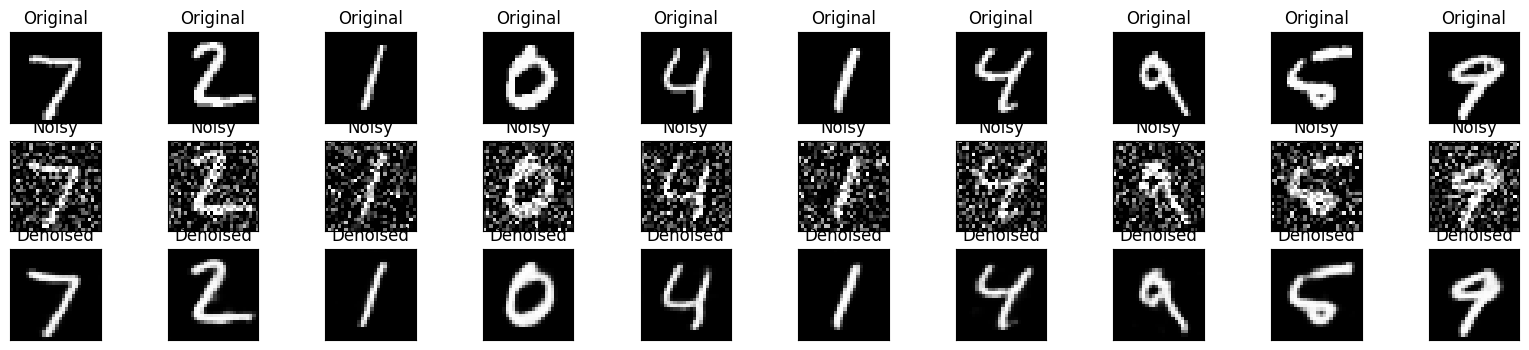

In [44]:
denoised_test_images = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(denoised_test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Performance evaluation

In [45]:
# valutazione prestazioni con PSNR
from skimage.metrics import peak_signal_noise_ratio

psnr_values = []
for i in range(len(x_test_noisy)):
    psnr = peak_signal_noise_ratio(x_test[i], denoised_test_images[i])
    psnr_values.append(psnr)
    if i<5: print(f"PSNR for image {i + 1}: {psnr}")

average_psnr = np.mean(psnr_values)
print(f"Average PSNR: {average_psnr}")


PSNR for image 1: 24.594831552295773
PSNR for image 2: 21.584019653321857
PSNR for image 3: 25.474497245175016
PSNR for image 4: 19.898130536017213
PSNR for image 5: 22.827958065380585
Average PSNR: 21.73971733379887


#### Rete più semplice:
- **Noise = 0.3**:
  - `val_loss = 0.0049`
  - `PSNR = 23.5`
- **Noise = 0.4**:
  - `val_loss = 0.0073`
  - `PSNR = 21.7`

#### Rete più complessa:
- **Risultati migliori**:
  - `PSNR = 24.05`
  - `val_loss` vicina a `0.001`